# Color

In [71]:
import seaborn as sns
palette = sns.color_palette("hls", 3)
palette

[(0.86, 0.3712, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.3712, 0.33999999999999997, 0.86)]

In [73]:
palette_hex = palette.as_hex()
print(palette_hex)

['#db5f57', '#57db5f', '#5f57db']


# Detrend results

In [74]:
import re

In [75]:
# Loop through all the .csv results in "plots/June20/detrend_y/degree){i}"  for i in range(1, 10), get item_id == AVERAGE's mase_score and print the file name and this mase_score

import os
import pandas as pd

results = {'baseline': {}, 'degree_1': {}, 'degree_2': {}, 
           'degree_3': {}, 'degree_4': {}, 'degree_5': {}, 
           'degree_6': {}, 'degree_7': {}, 'degree_8': {}, 'degree_9': {}}

BASELINE_MASE_PATH = "plots/patch_False_baseline"
print("---baseline:")
BASELINE_OVERALL_MASE = 0
for file in os.listdir(BASELINE_MASE_PATH):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(BASELINE_MASE_PATH, file))
        if df.loc[df['item_id'] == 'AVERAGE', 'mase_score'].values[0] is not None:
            mase_score = df.loc[df['item_id'] == 'AVERAGE', 'mase_score'].values[0]
            BASELINE_OVERALL_MASE += mase_score
            results['baseline'].update({file.replace('.csv',''): mase_score})
            print(file, mase_score)
        else:
            print(file, "None")

print(f"\n---baseline: {BASELINE_OVERALL_MASE / len(os.listdir(BASELINE_MASE_PATH))}")

# print(results)

for i in range(1, 10):
    path = f"plots/June20/detrend_y/degree_{i}"
    print(f"\n---degree_{i}:")
    DEGREE_OVERALL_MASE = 0
    for file in os.listdir(path):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(path, file))
            if df.loc[df['item_id'] == 'AVERAGE', 'mase_score'].values[0] is not None:
                mase_score = df.loc[df['item_id'] == 'AVERAGE', 'mase_score'].values[0]
                DEGREE_OVERALL_MASE += mase_score
                results[f'degree_{i}'].update({file.replace(f'_degree_{i}.csv',''): mase_score})
                print(file, mase_score)
            else:
                print(file, "None")
    print(f"\n---degree_{i}: {DEGREE_OVERALL_MASE / len(os.listdir(path))}")

# print(f"\n---baseline: {BASELINE_OVERALL_MASE / 10}")
print(results)

---baseline:
D_m4_monthly.csv 0.9821878976910204
D_monash_tourism_monthly.csv 2.3220378080301955
D_m4_quarterly.csv 1.558710810345254
D_m4_daily.csv 1.2891171745108556
D_solar_1h.csv 1.7932500534794868
D_m4_weekly.csv 2.311794929236051
D_m4_hourly.csv 1.1760744029591992
D_taxi_1h.csv 0.8810739868921901

---baseline: 0.7696404414465159

---degree_1:
D_taxi_1h_degree_1.csv 0.8816872261077671
D_solar_1h_degree_1.csv 2.114494507725287
D_m4_quarterly_degree_1.csv 1.3149982742314317
D_m4_daily_degree_1.csv 1.5336029551909467
D_monash_tourism_monthly_degree_1.csv 2.1700534725222003
D_m4_weekly_degree_1.csv 2.2420431047580194
D_m4_hourly_degree_1.csv 1.170553310081094
D_m4_monthly_degree_1.csv 1.2285457476313002

---degree_1: 0.7909986623905029

---degree_2:
D_m4_hourly_degree_2.csv 1.157709151388479
D_m4_monthly_degree_2.csv 1.3208232850841688
D_solar_1h_degree_2.csv 1.9045364298174876
D_taxi_1h_degree_2.csv 0.8855880941949106
D_m4_weekly_degree_2.csv 2.4145056059755934
D_m4_quarterly_degree_

D_m4_monthly baseline
D_m4_monthly degree_1
D_m4_monthly degree_2
D_m4_monthly degree_3
D_m4_monthly degree_4
D_m4_monthly degree_5
D_m4_monthly degree_6
D_m4_monthly degree_7
D_m4_monthly degree_8
D_m4_monthly degree_9
D_monash_tourism_monthly baseline
D_monash_tourism_monthly degree_1
D_monash_tourism_monthly degree_2
D_monash_tourism_monthly degree_3
D_monash_tourism_monthly degree_4
D_monash_tourism_monthly degree_5
D_monash_tourism_monthly degree_6
D_monash_tourism_monthly degree_7
D_monash_tourism_monthly degree_8
D_monash_tourism_monthly degree_9
D_m4_quarterly baseline
D_m4_quarterly degree_1
D_m4_quarterly degree_2
D_m4_quarterly degree_3
D_m4_quarterly degree_4
D_m4_quarterly degree_5
D_m4_quarterly degree_6
D_m4_quarterly degree_7
D_m4_quarterly degree_8
D_m4_quarterly degree_9
D_m4_daily baseline
D_m4_daily degree_1
D_m4_daily degree_2
D_m4_daily degree_3
D_m4_daily degree_4
D_m4_daily degree_5
D_m4_daily degree_6
D_m4_daily degree_7
D_m4_daily degree_8
D_m4_daily degree_9


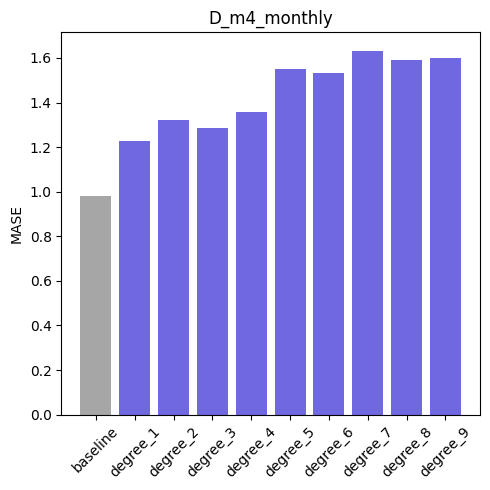

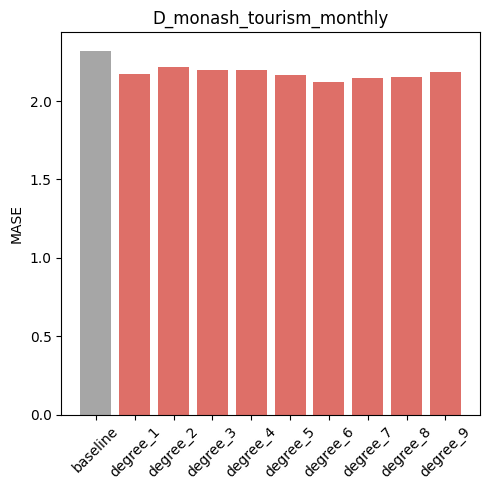

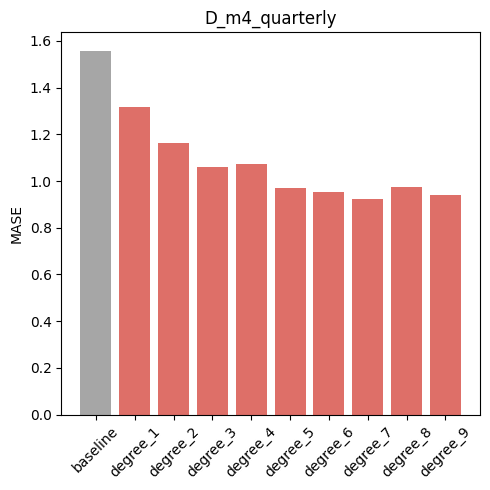

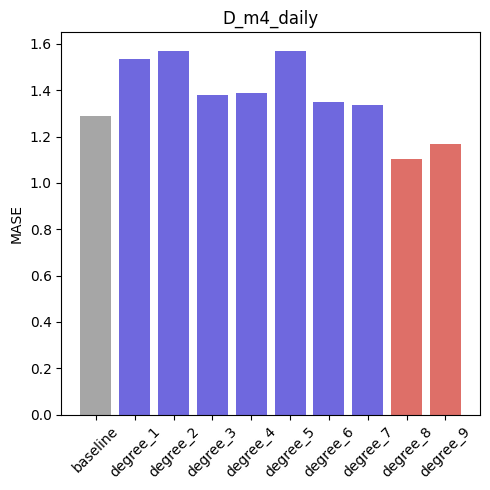

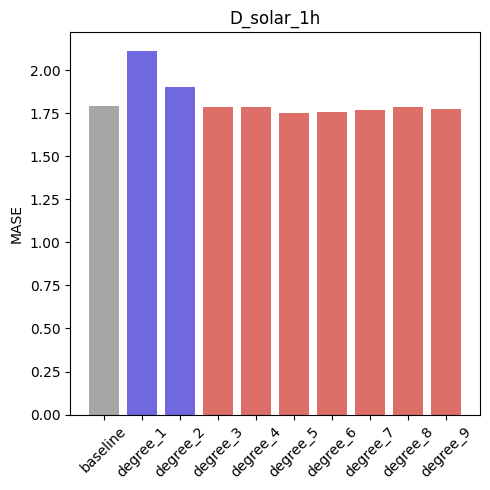

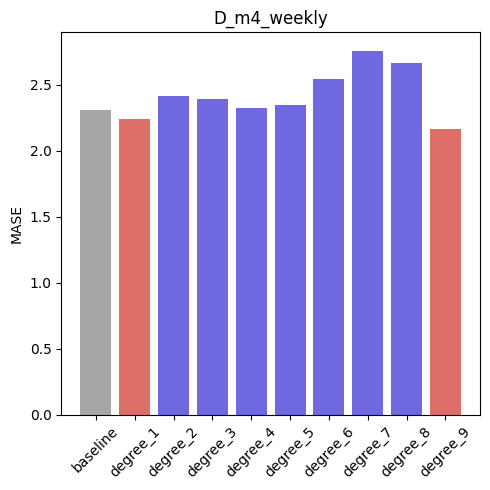

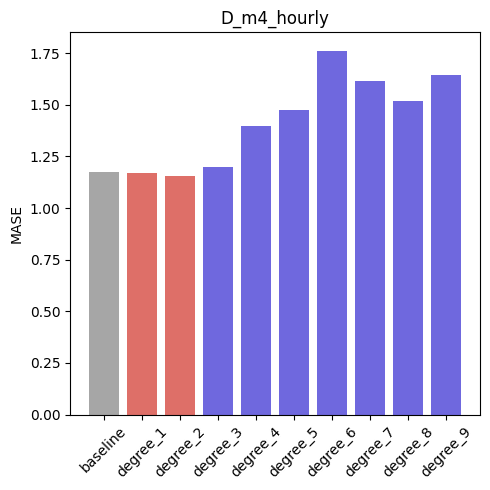

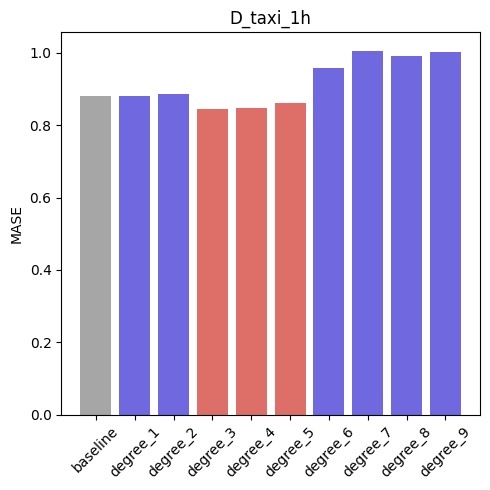

In [77]:
results['baseline'].keys()

plot_data = {}

for datasets in results['baseline'].keys():
    for key in results.keys():
        print(datasets, key)
        if datasets not in plot_data.keys():
            plot_data[datasets] = {}
            plot_data[datasets].update({key: results[key][datasets]})
        else:
            plot_data[datasets].update({key: results[key][datasets]})

print(plot_data)

# plot the barplot of the results in each key's keys
for datasets in plot_data.keys():
    fig = plt.figure(figsize=(5, 5))
    
    # Get baseline value for comparison
    baseline_value = plot_data[datasets]['baseline']
    
    # Create bars with appropriate colors
    for i, (key, value) in enumerate(plot_data[datasets].items()):
        if key == 'baseline':
            plt.bar(i, value, color='grey', alpha=0.7)
        elif value < baseline_value:
            plt.bar(i, value, color=palette_hex[0], alpha=0.9)
        else:
            plt.bar(i, value, color=palette_hex[2], alpha=0.9)
    
    plt.title(datasets)
    
    # Set x-axis labels
    plt.xticks(range(len(plot_data[datasets])), plot_data[datasets].keys(), rotation=45)
    
    # add y-axis label
    plt.ylabel('MASE')
    plt.tight_layout()  # This helps with overlapping labels
    plt.savefig(f'plots/June20/detrend_y/bar_plot/{datasets}.png', dpi=500, bbox_inches='tight')
    
    plt.show()

# Patching results

In [78]:
# Loop through all the .csv results in "plots/June20/patching_test_window_{i}/patch_True_window_{i}"  for i in [2, 4, 8, 16, 32, 64], get item_id == AVERAGE's mase_score and print the file name and this mase_score

# Loop through all the .csv results in "plots/June20/detrend_y/degree){i}"  for i in range(1, 10), get item_id == AVERAGE's mase_score and print the file name and this mase_score

import os
import pandas as pd

results = {'baseline': {}, 'window_2': {}, 'window_4': {}, 'window_8': {}, 'window_16': {}, 'window_32': {}, 'window_64': {}}

BASELINE_MASE_PATH = "plots/patch_False_baseline"
print("---baseline:")
BASELINE_OVERALL_MASE = 0
for file in os.listdir(BASELINE_MASE_PATH):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(BASELINE_MASE_PATH, file))
        if df.loc[df['item_id'] == 'AVERAGE', 'mase_score'].values[0] is not None:
            mase_score = df.loc[df['item_id'] == 'AVERAGE', 'mase_score'].values[0]
            BASELINE_OVERALL_MASE += mase_score
            results['baseline'].update({file.replace('.csv',''): mase_score})
            # print(file, mase_score)
        else:
            print(file, "None")

print(f"\n---baseline: {BASELINE_OVERALL_MASE / len(os.listdir(BASELINE_MASE_PATH))}")

# print(results)

for i in [2, 4, 8, 16, 32, 64]:
    path = f"plots/June20/patching_test_window_{i}/patch_True_window_{i}"
    print(f"\n---window_{i}:")
    DEGREE_OVERALL_MASE = 0
    for file in os.listdir(path):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(path, file))
            if df.loc[df['item_id'] == 'AVERAGE', 'mase_score'].values[0] is not None:
                mase_score = df.loc[df['item_id'] == 'AVERAGE', 'mase_score'].values[0]
                DEGREE_OVERALL_MASE += mase_score
                
                results[f'window_{i}'].update({file.replace(f'.csv',''): mase_score})
                print(file, mase_score)
            else:
                print(file, "None")
    print(f"\n---window_{i}: {DEGREE_OVERALL_MASE / len(os.listdir(path))}")

# print(f"\n---baseline: {BASELINE_OVERALL_MASE / 10}")
print(results)


---baseline:

---baseline: 0.7696404414465159

---window_2:
D_m4_monthly.csv 5.756298622672092
D_monash_tourism_monthly.csv 2.5144357533250856
D_m4_quarterly.csv 1.6888652726982711
D_m4_daily.csv 10.30712030183222
D_solar_1h.csv 0.6015331418223864
D_m4_weekly.csv 22.785624801739456
D_m4_hourly.csv 2.251926759266993
D_taxi_1h.csv 0.9409896087124304

---window_2: 5.855849282758617

---window_4:
D_m4_monthly.csv 4.889981588851084
D_monash_tourism_monthly.csv 2.3891678145909765
D_m4_quarterly.csv 1.6839119933953297
D_m4_daily.csv 6.409255982281073
D_solar_1h.csv 1.188446548513184
D_m4_weekly.csv 15.139219239292506
D_m4_hourly.csv 1.7333701459928263
D_taxi_1h.csv 0.8904202609996147

---window_4: 4.290471696739575

---window_8:
D_m4_monthly.csv 1.495624675390211
D_monash_tourism_monthly.csv 2.2986615007587514
D_m4_quarterly.csv 1.722743995337
D_m4_daily.csv 1.900854181629828
D_solar_1h.csv 0.7684734726822774
D_m4_weekly.csv 2.335457622565376
D_m4_hourly.csv 1.2566879929057235
D_taxi_1h.csv 0

D_m4_monthly baseline
D_m4_monthly window_2
D_m4_monthly window_4
D_m4_monthly window_8
D_m4_monthly window_16
D_m4_monthly window_32
D_m4_monthly window_64
D_monash_tourism_monthly baseline
D_monash_tourism_monthly window_2
D_monash_tourism_monthly window_4
D_monash_tourism_monthly window_8
D_monash_tourism_monthly window_16
D_monash_tourism_monthly window_32
D_monash_tourism_monthly window_64
D_m4_quarterly baseline
D_m4_quarterly window_2
D_m4_quarterly window_4
D_m4_quarterly window_8
D_m4_quarterly window_16
D_m4_quarterly window_32
D_m4_quarterly window_64
D_m4_daily baseline
D_m4_daily window_2
D_m4_daily window_4
D_m4_daily window_8
D_m4_daily window_16
D_m4_daily window_32
D_m4_daily window_64
D_solar_1h baseline
D_solar_1h window_2
D_solar_1h window_4
D_solar_1h window_8
D_solar_1h window_16
D_solar_1h window_32
D_solar_1h window_64
D_solar_1h window_64 not in results
D_m4_weekly baseline
D_m4_weekly window_2
D_m4_weekly window_4
D_m4_weekly window_8
D_m4_weekly window_16
D_m

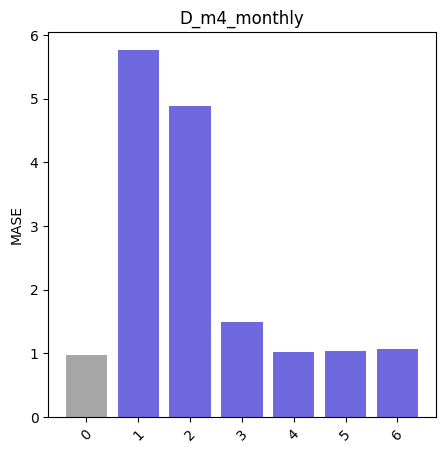

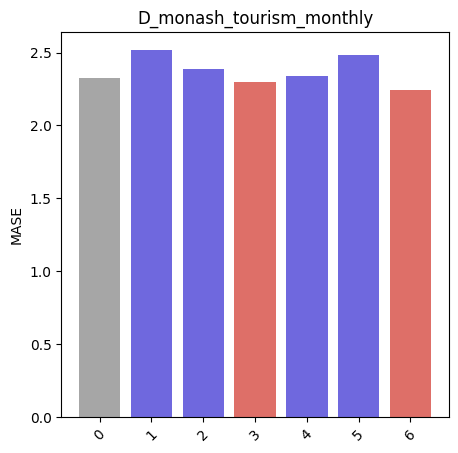

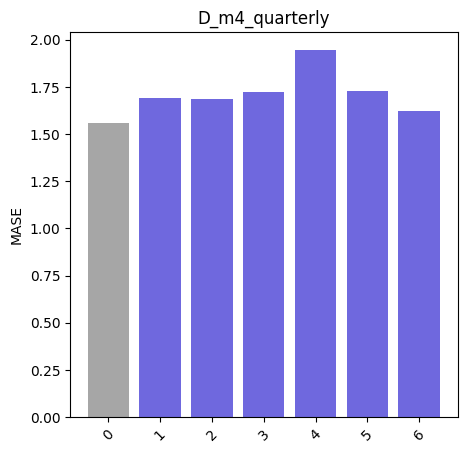

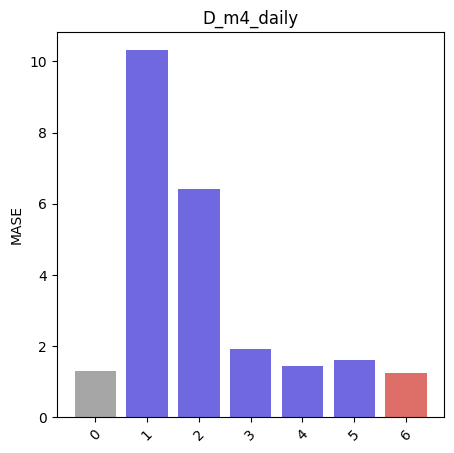

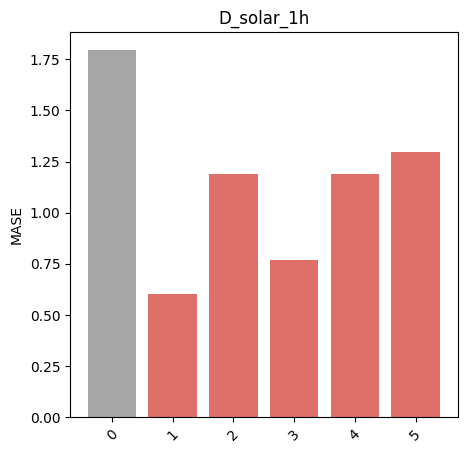

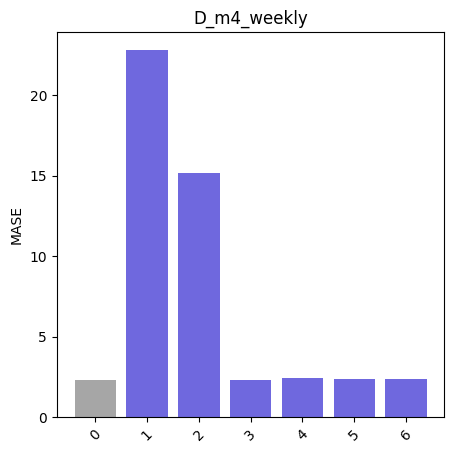

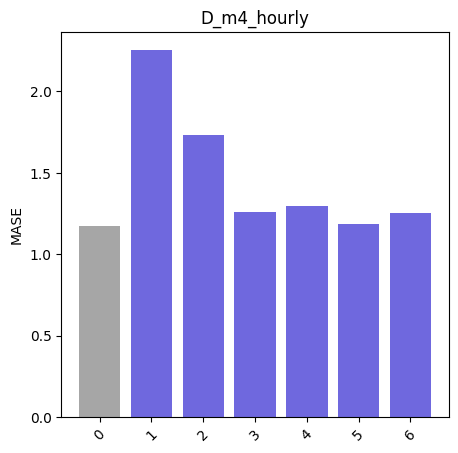

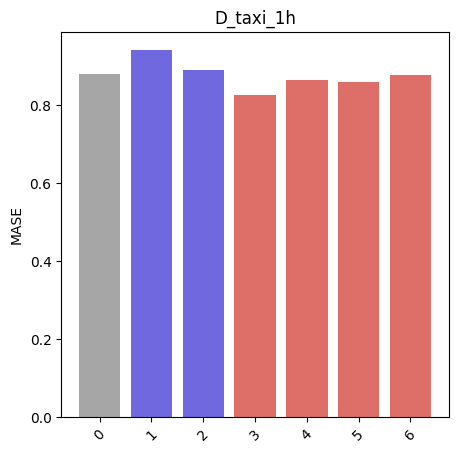

In [79]:
results['baseline'].keys()

plot_data = {}

for datasets in results['baseline'].keys():
    for key in results.keys():
        print(datasets, key)
        if datasets in results[key]:
            if datasets not in plot_data.keys():
                plot_data[datasets] = {}
                plot_data[datasets].update({key: results[key][datasets]})
            else:
                plot_data[datasets].update({key: results[key][datasets]})
        else:
            print(datasets, key, "not in results")
print(plot_data)

# plot the barplot of the results in each key's keys

for datasets in plot_data.keys():
    fig = plt.figure(figsize=(5, 5))
    # Get baseline value for comparison
    baseline_value = plot_data[datasets]['baseline']
    
    # Create bars with appropriate colors
    for i, (key, value) in enumerate(plot_data[datasets].items()):
        if key == 'baseline':
            plt.bar(i, value, color='grey', alpha=0.7)
        elif value < baseline_value:
            plt.bar(i, value, color=palette_hex[0], alpha=0.9)
        else:
            plt.bar(i, value, color=palette_hex[2], alpha=0.9)
    # plt.bar(plot_data[datasets].keys(), plot_data[datasets].values())
    plt.title(datasets)
    
    # # make the 'baseline' bar black
    # for i, key in enumerate(plot_data[datasets].keys()):
    #     if key == 'baseline':
    #         plt.bar(i, plot_data[datasets][key], color='black')
    #     else:
    #         plt.bar(i, plot_data[datasets][key], color='b')
    
    # tilt the x-axis labels
    plt.xticks(rotation=45)
    
    
    # add y-axis label
    plt.ylabel('MASE')
    plt.savefig(f'plots/June20/patch_plots/{datasets}.png', dpi=500)
    
    plt.show()

# plt.bar(plot_data.keys(), plot_data.values())
# plt.title('baseline')
# plt.show()